In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# We are working on movie ratings dataset to understand the data and analyze it to answer some questions
movies = pd.read_csv('/home/mitalideshpande/Movie-Ratings.csv')

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [12]:
# Rename the column names to simplify
movies.columns = ['Film', 'Genre', 'CriticsRatings', 'AudienceRatings',
       'BudgetMillions', 'ReleaseYear']

In [19]:
# Info about different columns
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
ReleaseYear        559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


In [66]:
# Convert variables into categorial variables
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.ReleaseYear = movies.ReleaseYear.astype('category')

movies.head()

,Film,Genre,CriticsRatings,AudienceRatings,BudgetMillions,ReleaseYear
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticsRatings     559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
ReleaseYear        559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


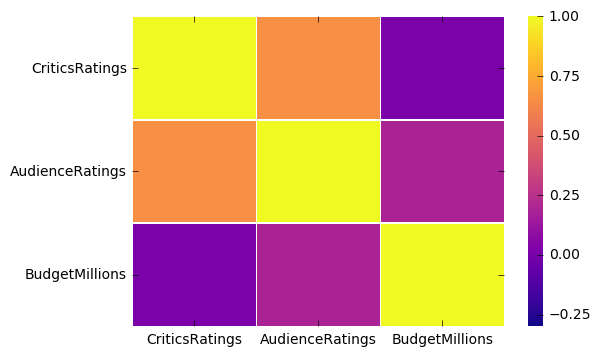

In [255]:
# Let's create a co-relation matrix to understand relation between different variables
corr = movies.corr()
sns.heatmap(corr, linewidths=.5, vmin=-0.3, vmax= 1, cmap='plasma')

# We can see there is positive co-relation between audience ratings and critics ratings.
# BudgetMillions and CriticsRatings have negative co-relation

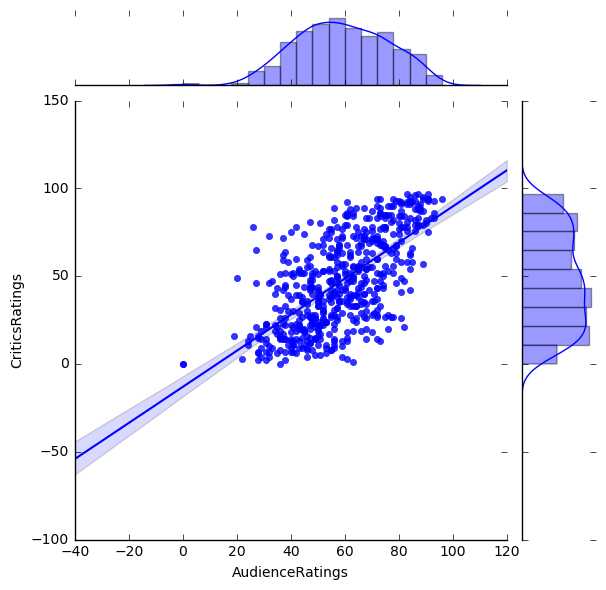

In [263]:
# We can see co-relation between specific variables we can use Jointplots
jt1 = sns.jointplot(data=movies, x='AudienceRatings', y='CriticsRatings', kind='reg')

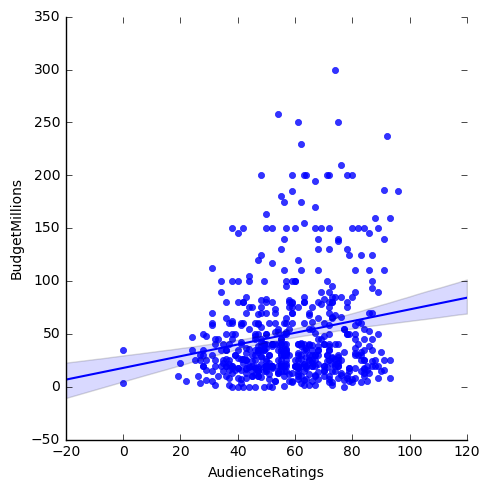

In [265]:
jt2 = sns.lmplot(data=movies, x='AudienceRatings', y='BudgetMillions')

In [242]:
# Let's answer some data analysis questions
# 1. How many movies were released each year
# 2. What are different types of genres available and count of movies as per genre
# 3. Compare ratings - critics/audience based on genre
# 4. How the movie budgets have increased over time

In [272]:
# budget per genre
budget_genre = movies.groupby('Genre')['BudgetMillions'].sum().reset_index().sort_values(by='BudgetMillions', ascending=False).reset_index(drop=True)
budget_genre

,Genre,BudgetMillions
0,Action,13033
1,Comedy,6211
2,Drama,2813
3,Adventure,2363
4,Thriller,1968
5,Horror,1062
6,Romance,632


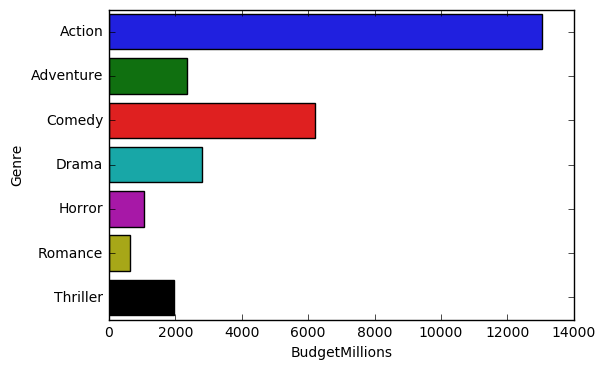

In [277]:
sns.barplot(x='BudgetMillions', y='Genre', data=budget_genre)

In [276]:
# instead of manually typing we can loop over the categories
list_gen = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list_gen.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
    
#plt.hist(list_gen, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.hist(budget_genre, x='Genre',bins=30, stacked=True, rwidth=1)
plt.legend()
plt.show()

TypeError: hist() got multiple values for argument 'x'

In [142]:
#1. Number of Releases each year
year_grp=movies.groupby("ReleaseYear")['Film'].count().reset_index().sort_values(by='ReleaseYear',ascending=True).reset_index(drop=True)
year_grp.columns=['ReleaseYear','Number_of_release']
year_grp

,ReleaseYear,Number_of_release
0,2007,79
1,2008,122
2,2009,116
3,2010,119
4,2011,123


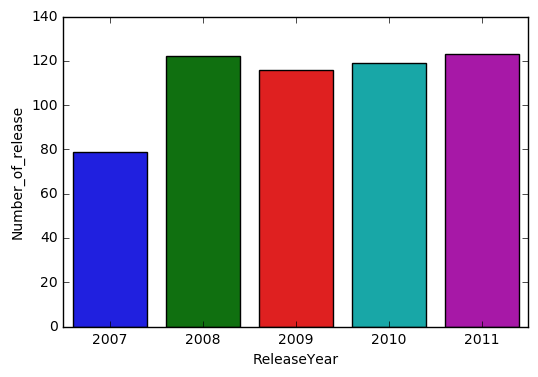

In [145]:
# We can see from plot that there has been increase in movies released each year
sns.barplot(x='ReleaseYear', y='Number_of_release', data=year_grp)

In [151]:
# 2. Different genres of movies and count of movies as per categories
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [158]:
# The different movie Genres are Action, Adventure, Comedy, Drama, Horror, Romance, Thriller
# Now we see count of movies for each genre
genre_grp = movies.groupby('Genre')['Film'].count().reset_index()
genre_grp.columns=['Genre','Number_of_release']
genre_grp

,Genre,Number_of_release
0,Action,154
1,Adventure,29
2,Comedy,172
3,Drama,101
4,Horror,49
5,Romance,18
6,Thriller,36


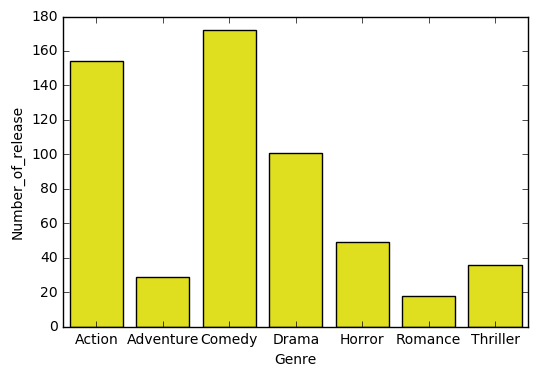

In [164]:
# Plot a graph to see genre wise release
sns.barplot(x='Genre',y='Number_of_release', data=genre_grp, color='yellow')
# We can see maximum movies are made in comedy genre and least number of movies in Romance genre

In [200]:
# 3. Avg critics and audience ratings as per genre
rating_grp = movies.groupby('Genre')['CriticsRatings','AudienceRatings'].mean().round().reset_index()
rating_grp

,Genre,CriticsRatings,AudienceRatings
0,Action,44.0,59.0
1,Adventure,53.0,63.0
2,Comedy,45.0,56.0
3,Drama,56.0,64.0
4,Horror,35.0,47.0
5,Romance,45.0,60.0
6,Thriller,59.0,66.0


In [201]:
# We need to transform data to get a grouped bar plot
melt_rt = pd.melt(rating_grp, id_vars=['Genre'], var_name='Rating_type', value_name='AvgValue')
melt_rt

,Genre,Rating_type,AvgValue
0,Action,CriticsRatings,44.0
1,Adventure,CriticsRatings,53.0
2,Comedy,CriticsRatings,45.0
3,Drama,CriticsRatings,56.0
4,Horror,CriticsRatings,35.0
5,Romance,CriticsRatings,45.0
6,Thriller,CriticsRatings,59.0
7,Action,AudienceRatings,59.0
8,Adventure,AudienceRatings,63.0
9,Comedy,AudienceRatings,56.0


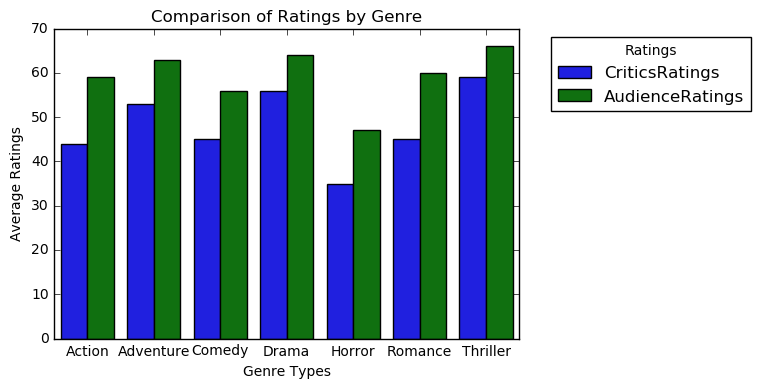

In [202]:
# We'll plot the avg ratings for genre
sns.barplot(x='Genre',y='AvgValue', hue='Rating_type',data=melt_rt)
plt.xlabel('Genre Types')
plt.ylabel('Average Ratings')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2).set_title('Ratings')
plt.title('Comparison of Ratings by Genre')
# From the graph we can see that Thriller movies have pretty high ratings for both critics and audience although few movies are 
# made in this genre. Also, horror has low ratings compared to other genres.
# For all genres the Audience provides higher ratings compared to Critics

In [217]:
movies.head()
# How the budgets have changed over years
# I added the budget of all movies each year
budget_grp = movies.groupby('ReleaseYear')['BudgetMillions'].sum().reset_index()
budget_grp

,ReleaseYear,BudgetMillions
0,2007,4571
1,2008,5726
2,2009,5581
3,2010,5997
4,2011,6207


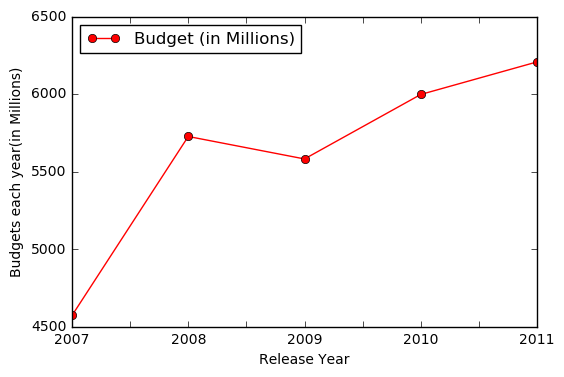

In [241]:
budget_grp.plot(x='ReleaseYear',y='BudgetMillions', marker='o', color='red')
plt.xlabel('Release Year')
plt.ylabel('Budgets each year(in Millions)')
lt = ['Budget (in Millions)']
plt.legend(lt, loc='upper left')
plt.show()
# We can see that in 2008 there was a sharp increase in the movie budgets which further growing in year 2010 and 2011